
# Final Project for Machine Learning and Big Data Course, Data Science and Application 
## Metro College of Technology

### October, 2021

### Ana Clara Tupinambá Freitas, oriented by Professor Tareq Jaber

# Bike Sharing

## Introduction

Bike sharing systems are a means of transportation that provides easy and cheap commute and it is also a means of leisure. 
The features of the dataset are: 

    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

This study will use the following predictors: 

    - season : season (1:springer, 2:summer, 3:fall, 4:winter)
    - yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
    - casual: count of casual users
	- registered: count of registered users
    - peak : feature inserted to identify if it is peak hour or no

The **target** feature in this study will be: **registered**.

This study will try to answer some questions:

    - What factors may contribute to demand of bikes? Such as:
        + What are the peak hours in renting bikes?
        + Does peak hours have an impact on the rent of bikes?
     
    
*The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data.    

Data Source:https://archive-beta.ics.uci.edu/ml/datasets/bike+sharing+dataset, downloaded at Oct 13th,2021

# Importing Packages

In [1]:
import os
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import kstest
import researchpy as rp
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from math import sqrt

import statsmodels.api as sm

from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor 

import warnings

# User Defined Functions

## Univariate Categorical:

In [2]:
def uni_categorical(df,size):
    '''This function returns summarization and visual for univariate analysis of categorical features of a dataset'''
    print('############### Univariate analysis - Categorical ###############')
    df = df.select_dtypes(exclude=np.number) #extracting only non-numerical features
    for i in df.columns:
     #   if type(df.loc[0, i]) == str: #checking type of features
# Summarization
            d1 = df[i].value_counts()
            d2 = round(df[i].value_counts(normalize=True)*100, 2)
            d3 = pd.concat([d1, d2], axis=1)
            d3.columns = ['Count', 'Percentage']
            print('\nThis is univariate analysis for', "'", i, "'", '\n', d3)

 # Visualization
            d1 = pd.DataFrame(d1).T
            d1 = pd.melt(d1,var_name=str(i),value_vars=d1) 
            fig, ax = plt.subplots()
            if size == 'L':
                fig.set_size_inches(22, 10)
            else:
                fig.set_size_inches(12, 8)
            sns.set_context("paper", font_scale=1.5)
            plot1=sns.barplot(y=d1['value'],x=d1[i], data=d1)
            for p, label in zip(plot1.patches, d1['value']):
                ax.annotate(label, (p.get_x()+0.3, p.get_height()+2))
            plt.xticks(rotation=45, ha='right')
            ax.set_title('Univariate plot')
            plt.show()
    print('\n\n')

## Univariate Numerical:

In [3]:
def uni_numerical(df):
    '''This function returns summarization and visual for univariate analysis of numerical features of a dataset'''
    
# Summarization
    print('############### Univariate analysis - Numerical ###############')
    df.describe()

    Summary = dict(df.describe())
    for i in Summary:
        Summary[i]['count'] = df[i].count()
        Summary[i]['variance'] = df[i].var()
        Summary[i]['IQR'] = Summary[i]['75%'] - Summary[i]['25%']
        Summary[i]['range'] = Summary[i]['max'] - Summary[i]['min']
        Summary[i]['skewness'] = df[i].skew()
        Summary[i]['kurtosis'] = df[i].kurtosis()
        Summary[i]['mode'] = df[i].mode() #axis='columns'
#    print(Summary)
        print('\nThis is univariate analysis for',"'", i, "'", '\n', Summary[i])
# Visualization
        # Histogram and Boxplot
        sns.set_palette("dark") # colorblind   pastel
        sns.set(style="white") #whitegrid ticks
        sns.set_context("paper", font_scale=1.5)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.12, .88)})
        f.set_size_inches(12, 8)
        sns.distplot(a=df[i], hist=True, kde=True, rug=True, ax=ax_hist)
        sns.boxplot(x=df[i], ax=ax_box)
        ax_box.set_title('Univariate plot')
        ax_box.set(xlabel='')
        plt.show()
# normality test
#        stat, p_normal = shapiro(df[i])
        stat, p_normal = kstest(df[i],'norm')    
        print('Kolmogorov\'s Statistics=%.3f, p=%.3f' % (stat, p_normal))
# interpretation
        alpha = 0.05
        if p_normal > alpha:
            print('Normality\'s test result: Sample looks Gaussian (fail to reject H0)')
        else:
            print('Normality\'s test result: Sample does not look Gaussian (reject H0)')

## Bivariate Numerical target x Categorical features:

In [4]:
def bi_categorical_datetime_cont(df,var_datetime,var_target,quartil):                
    '''This function returns max and min,and visual, for bivariate analysis of continuous target x datetime features. '''
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    sns.set_context("paper", font_scale=1)
    g = sns.lineplot(x=var_datetime,y=var_target,data=df)
    if quartil == 'Y':
        g.axhline(np.quantile(df[var_target],.75),c='red',label='Q3(Upper 25%)',linestyle='--')
        plt.legend(loc=4)
    plt.xticks(rotation=45, ha='right')
    plt.title('Number of '+str(var_target)+' per '+str(var_datetime))
    plt.show()

In [5]:
def bi_categorical_cont(df,var_target,size):                
    '''This function returns summarization, visual, and test of independency for bivariate analysis of continuous target x categorical  features,taking a continuous variable as the target.  '''
    
    print('############### Bivariate analysis - Categorical x Numerical ###############')
    print('\n*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test')

# Defining alpha:
    alpha = 0.05
# Verifying datatypes extract only numerics
    df_num = df.select_dtypes(include=np.number) 
    
# If target is numeric:         
    if var_target in df_num.columns:
        df_cat = df.select_dtypes(exclude=np.number)
        for i in df_cat.columns:
            if i != var_target:
                vis = pd.crosstab(df[var_target],df[i], margins = False)
                tab = rp.summary_cont(df[var_target].groupby(df[i]),decimals=3)#conf=0.95
#                print(tab)
                result = df.groupby(i)[var_target].apply(list) 
#                print('Result:',result)
# Printing Assumptions:
                if len(result.index) == 2:
                    print('\nThis is Mann-Whitney U test for' , var_target, 'and',i )
                    print('\nMann-Whitney U test:\n Null hypothesis: The distribution of scores for the two groups are equal.\n Assumptions:\n 1.Dependent variable that is measured at the continuous or ordinal level.\n 2.Groups are independent of one another. \n 3.What\'s the shape of each group distribution.\n\t a) Similar shapes: \n\t\t Alternative hypothesis: the medians of the two groups are not equal.\n\t b) Different shapes:\n\t\t Alternative hypothesis: the distribution of scores for the two groups are not equal.') 
                    print('\nSummary:')
                    print(tab)
# Visualization
                    sns.set_palette("dark") # colorblind   pastel
                    sns.set(style="white") # whitegrid ticks
                    fig, ax = plt.subplots()
                    fig.set_size_inches(12, 4)
                    sns.boxplot(x=df[i],y=df[var_target], data=df)  
                    sns.stripplot(x=df[i],y=df[var_target], data=df,
              size=4, color=".3", linewidth=0)
                    plt.xticks(rotation=45, ha='right')
                    ax.set_title('Bivariate plot: ' + var_target + ' and ' + i)
                    plt.show()
                    l = pd.melt(vis,var_name=str(i),value_vars=vis)
                    l = pd.DataFrame(l)
                
                else:
# ANOVA
# Printing Assumptions: 
                    print('\nThis is ANOVA/Kruskal for' , var_target, 'and',i,'\n' )
                    print('One-way ANOVA Assumptions\n In order to run a one-way ANOVA the following assumptions must be met:\n 1.The response of interest is continuous and normally distributed for each treatment group.\n \tCLT :\n \t\tIf looks normal each group must have more than 30 observations – no need for Normality’s test;\n \t\tIf moderately skewed(|0.5| < skewness < |1.0|), each group must have more than 100 observations – no need for Normality’s test;\n\t*If not normal, proceed to Kruskal test.\n 2.Treatment groups are independent of one another. \n 3.There are no major outliers.\n 4.A check for unequal variances will help determine which version of a one-way ANOVA is most appropriate (Levene’s test, Null hypothesis: variances are equal between groups):\n \tA .If variances are equal, then the assumptions of a standard one-way ANOVA are met.\n \tB. If variances are unequal, then a Kruskal’s test is appropriate.\n\n*Kruskal\'s Null hypothesis: H0: the group populations have equal dominance; i.e. when one element is drawn at random from each group population, the largest (or smallest, or second smallest, etc.) element is equally likely to come from any one of the group populations or H0: the group population medians are equal(if groups distributions have the same shape) ')
                    print('\nSummary:')
                    print(tab)
# Visualization
                    sns.set_palette("dark") # colorblind   pastel
                    sns.set(style="white") # whitegrid ticks
                    fig, ax = plt.subplots()
                    if size == 'L':
                        fig.set_size_inches(50, 4)
                    else:
                        fig.set_size_inches(12, 4)
                    sns.set_context("paper", font_scale=1.2)
                    sns.boxplot(x=df[i],y=df[var_target], data=df)  
                    sns.stripplot(x=df[i],y=df[var_target], data=df,
              size=4, color=".3", linewidth=0)
                    plt.xticks(rotation=45, ha='right',fontsize=12)
                    ax.set_title('Bivariate plot: ' + var_target + ' and ' + i)
                    plt.show()
                    l = pd.melt(vis,var_name=str(i),value_vars=vis)
                    l = pd.DataFrame(l)
                    
            if len(result.index) == 2:
#T-test                             
                stat_l, p_lev = levene(*result)
                print('\nLevene\'s Statistics=%.3f, p=%.3f' % (stat_l, p_lev))
                if p_lev  > alpha:#Equal varinaces
                    stat_u, p_u = mannwhitneyu(*result)
                    print('Levene\'s test result: Equal variances (fail to reject H0)')
                    print('\nMann-Whitney U \'s Null hypothesis: The distribution of scores for the two groups are equal.')
                    print('\nMann-Whitney U \'s Statistics (equal variances)=%.3f, p=%.3f' % (stat_u, p_u))
# interpretation
                    if p_u > alpha: 
                        print('Mann-Whitney U \'s test result: There are no differences in medians, samples medians are equal. (fail to reject H0)')
                    else:
                        print('Mann-Whitney U \'s test result: The medians of the two groups are not equal. (reject H0)')  
                        
                else:#Unequal variances
                    stat_u, p_u = mannwhitneyu(*result)
                    print('Levene\'s test result: Unequal variances (reject H0)')
                    print('\nMann-Whitney U \'s Statistics (unequal variances)=%.3f, p=%.3f' % (stat_u, p_u))
# interpretation
                    if p_u > alpha: 
                        print('\nMann-Whitney U \'s Null hypothesis: The distribution of scores for the two groups are equal.')
                        print('Mann-Whitney U \'s test result: The distribution of scores for the two groups are equal. (fail to reject H0)')
                    else:
                        print('\nMann-Whitney U \'s Null hypothesis: The distribution of scores for the two groups are equal.')
                        print('Mann-Whitney U \'s test result: The distribution of scores for the two groups are not equal. (reject H0)')   
                    
  
# ANOVA
            else:    
                stat_l, p_lev = levene(*result)
                print('\nLevene\'s Statistics=%.3f, p=%.3f' % (stat_l, p_lev))
                p_one = np.nan
                if p_lev  > alpha: #Equal variances
                    stat_one, p_one = f_oneway(*result)
                    stat_k, p_h =  kruskal(*result)
                    print('Levene\'s test result: equal variances (reject H0)')
                    print('\nKruskal\'s Statistics(equal variances)=%.3f, p=%.3f' % (stat_k, p_h))
                    print('\nANOVA\'s Statistics(equal variances)=%.3f, p=%.3f' % (stat_one, p_one))
                    if p_one > alpha: 
                        print('\nANOVA\'s Null hypothesis: There are  differences in means')
                        print('ANOVA\'s test result: There are no differences in means, samples are equal. (fail to reject H0)')
                    else:
                        print('\nANOVA\'s Null hypothesis: There are  differences in means')
                        print('ANOVA\'s test result: There are  differences in means (reject H0)')   
                else: # Unequal variances
                    stat_k, p_h  = kruskal(*result)
                    print('Levene\'s test result: Unequal variances (reject H0)')
                    print('\nKruskal\'s Statistics(unequal variances)=%.3f, p=%.3f' % (stat_k, p_h))
                
                if p_h > alpha: 
                    print('\nKruskal\'s Null hypothesis: All sample distributions are equal.')
                    print('Kruskal\'s test result: All sample distributions are equal. (fail to reject H0)')
                else:
                    print('\nKruskal\'s Null hypothesis: All sample distributions are equal.')
                    print('Kruskal\'s test result: One or more sample distributions are not equal. (reject H0)')   

    print('\n\n')

## Bivariate Numerical target x Numerical features:

In [6]:
def bi_numerical_num(df):
    '''This function returns summarization, visual,and test of independency for bivariate analysis of numerical x numerical features. '''
    
    print('############### Bivariate analysis - Numerical x Numerical ###############')
# Printing Assumptions:
    print('\nCorrelation (how strong the correlation is):\n Null hypothesis: there’s no association between variables.\n \t1.Normal distribution for both variables for pearson;\n  \t2.homoscedasticity assumes that data is equally distributed about the regression line.\n \t3.Linear? \n \t\tLinear: pearson\n \t\tMonotonically related (not normal): spearman kendall hoeffding \n')

# Verifying datatypes extract only numerics
    df = df.select_dtypes(include=np.number)
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


# # correlation test
#     print('\nThis is Pearson\'s correlation:')
#     print(df.corrwith(df[var_target], method='pearson'), '\n')
#     print('This is Spearman\'s correlation:')
#     print(df.corrwith(df[var_target], method='spearman'), '\n')
    
# Visualization
    #Pearson
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(8,8)) 
    sns.set_palette("dark") # colorblind   pastel
    sns.set(style="whitegrid") #whitegrid ticks
    sns.heatmap(round(df.corr(method='pearson'),2),annot=True, annot_kws={"fontsize":11},linewidths=0.01,mask=mask)
    plt.title('Pearson correlation')
    plt.show()
    


## Calculating Adjusted R^2 value

In [7]:
def adjR2(X,R2):
    '''This function returns the R^2 value given X and R^2 value'''
    n = X.shape[0]
    k = X.shape[1]
    return 1 - ((n-1)/(n-k-1))*(1-R2)

## Plot of the model coefficients with 95% interval

In [8]:
# Define function to output plot of the model coefficients with 95% interval

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(35, 3))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()

## Add Seasons

In [9]:
def find_season(month):
    season_month_north = {
        12:'Winter', 1:'Winter', 2:'Winter',
        3:'Spring', 4:'Spring', 5:'Spring',
        6:'Summer', 7:'Summer', 8:'Summer',
        9:'Autumn', 10:'Autumn', 11:'Autumn'}
    return season_month_north.get(month)

## Checking Missing values

In [10]:
def chck_miss(df):

    Total = df.isnull().count().sort_values(ascending=True)        
    Missing = df.isnull().sum().sort_values(ascending=True)   

    Percentage_Miss = round((Missing/Total)*100,2)

    Summary = pd.concat([Total,Missing, Percentage_Miss],axis=1,keys=['Total','# Missing','% Missing'],sort=True)
          
    print('Are there any missing value?')                    
    print(Summary)         

    del Total, Missing, Percentage_Miss, Summary 

#### *Setting warnings OFF

In [11]:
warnings.filterwarnings('ignore')

# Loading Data Frame

## First look at the dataset:

We see that there are 18 features and 174392 observations in the dataset in it's downloaded form:

In [12]:
# Changing Directory
os.chdir(r'D:\1_Metro College\Courses\ML and Big Data\Project\Regression\Data')

df = pd.read_csv('hour.csv',parse_dates=['dteday'])

df.shape

(17379, 17)

### Is there any missing values?

In [13]:
chck_miss(df)

Are there any missing value?
            Total  # Missing  % Missing
atemp       17379          0        0.0
casual      17379          0        0.0
cnt         17379          0        0.0
dteday      17379          0        0.0
holiday     17379          0        0.0
hr          17379          0        0.0
hum         17379          0        0.0
instant     17379          0        0.0
mnth        17379          0        0.0
registered  17379          0        0.0
season      17379          0        0.0
temp        17379          0        0.0
weathersit  17379          0        0.0
weekday     17379          0        0.0
windspeed   17379          0        0.0
workingday  17379          0        0.0
yr          17379          0        0.0


We can see that there's no missing values.

### Is there any duplicated values?

We see that Age Group, FSA, and Neighbourhood Name  have missing features

In [14]:
print('There are', df.duplicated().sum(), 'duplicated values in training data set' )
df.drop_duplicates(keep='last',inplace=True)

There are 0 duplicated values in training data set


In [15]:
print('There are', df['instant'].duplicated().sum(),'duplicated instances.')

There are 0 duplicated instances.


## First and last instances

In [16]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Transforming dataframe to EDA:

To facilitate the interpretation of some graphs, categorical values will be recoded to its values. No other transformation will be performed.

In [17]:
#Renaming Season:
dict_season = {1: 'Spring',
        2: 'Summer',
        3: 'Fall',
        4: 'Winter'
       }

#Renaming Year:
dict_year = {0: '2011',
        1: '2012'
       }

#Renaming Month:
dict_month = {1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
       }

#Renaming Weekday:
dict_week = {0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
       }

#Renaming YN:
dict_YN = {0: 'No',
        1: 'Yes'
       }

#Renaming Weather:
dict_weather = {1: 'Clear, Few clouds, Partly cloudy',
        2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
        3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
        4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' 
            }
#Copy of df (features values renamed for exploratory analysis):
df1 = df.copy()

#Renaming season
for key in dict_season.keys():
    df1['season'] = df1['season'].replace(key, dict_season[key])
    
for key in dict_year.keys():
    df1['yr'] = df1['yr'].replace(key, dict_year[key])
    
#Renaming month
for key in dict_month.keys():
    df1['mnth'] = df1['mnth'].replace(key, dict_month[key])
    
#Renaming binary features
for key in dict_YN.keys():
    df1['holiday'] = df1['holiday'].replace(key, dict_YN[key])
    df1['workingday'] = df1['workingday'].replace(key, dict_YN[key])

#Renaming weekday
for key in dict_week.keys():
    df1['weekday'] = df1['weekday'].replace(key, dict_week[key])
    
#Renaming weather
for key in dict_weather.keys():
    df1['weathersit'] = df1['weathersit'].replace(key, dict_weather[key])


# First look at the transformed dataset:

We see that there are 645 data points and 6 features:

In [18]:
df1.shape

(17379, 17)

First and Last observations:

In [19]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,Dec,19,No,Tuesday,Yes,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,2012,Dec,20,No,Tuesday,Yes,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,2012,Dec,21,No,Tuesday,Yes,"Clear, Few clouds, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,2012,Dec,22,No,Tuesday,Yes,"Clear, Few clouds, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61


#### What are the different data types of the dataframe?

We see 9 numericals and 7 objects(strings) features, 1 datetime.

In [20]:
print('Features types:\n ',df1.dtypes) 

Features types:
  instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
hr                     int64
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


#### Setting categorical features as such:

In [21]:
for i in ['instant',  'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit']:
        df1[i] = df1[i].astype('category')
        print('These are the categories of \'',i,' \':\n',df1[i].values.categories, '\n')
del i

These are the categories of ' instant  ':
 Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            17370, 17371, 17372, 17373, 17374, 17375, 17376, 17377, 17378,
            17379],
           dtype='int64', length=17379) 

These are the categories of ' season  ':
 Index(['Fall', 'Spring', 'Summer', 'Winter'], dtype='object') 

These are the categories of ' yr  ':
 Index(['2011', '2012'], dtype='object') 

These are the categories of ' mnth  ':
 Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object') 

These are the categories of ' hr  ':
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64') 

These are the categories of ' holiday  ':
 Index(['No', 'Yes'], dtype='object') 

These are the categories of ' weekday  ':
 Index(['Friday', 'Monday', 'Saturday', 'Sunday', 

#### Checking Summary of all features of the dataset:

In [22]:
df1.describe(include='all',datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
instant,17379.0,17379.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dteday,17379,NaN,NaN,NaN,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,17379,4,Fall,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,17379,2,2012,8734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,17379,12,Jul,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,17379.0,24.0,17.0,730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,17379,2,No,16879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,17379,7,Sunday,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,17379,2,Yes,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weathersit,17379,4,"Clear, Few clouds, Partly cloudy",11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [23]:
print('The first day of gathered data is: ',df1['dteday'].min(),'\n', 'and the last one is: ',df1['dteday'].max() )

The first day of gathered data is:  2011-01-01 00:00:00 
 and the last one is:  2012-12-31 00:00:00


############### Univariate analysis - Categorical ###############

This is univariate analysis for ' hr ' 
     Count  Percentage
17    730        4.20
16    730        4.20
13    729        4.19
15    729        4.19
14    729        4.19
12    728        4.19
22    728        4.19
21    728        4.19
20    728        4.19
19    728        4.19
18    728        4.19
23    728        4.19
11    727        4.18
10    727        4.18
9     727        4.18
8     727        4.18
7     727        4.18
0     726        4.18
6     725        4.17
1     724        4.17
5     717        4.13
2     715        4.11
4     697        4.01
3     697        4.01


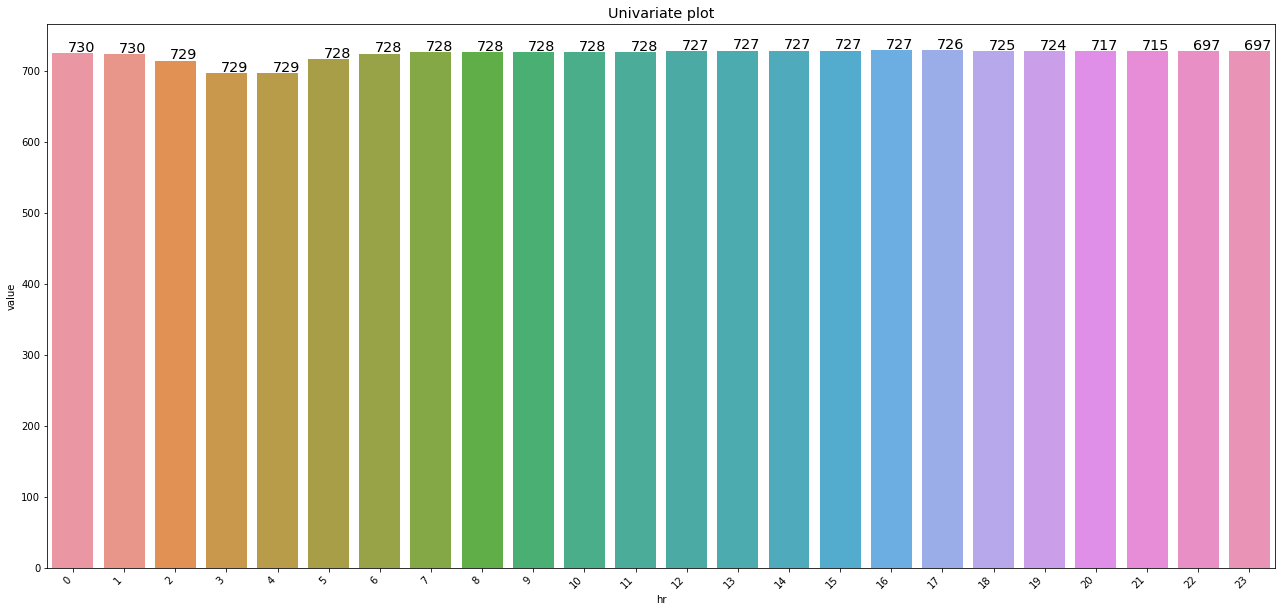

In [24]:
uni_categorical(df1[['hr']].astype('object'),'L')

We can see that the distributions are approximately equal.

#### Looking at categorical features:

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' season ' 
         Count  Percentage
Fall     4496       25.87
Summer   4409       25.37
Spring   4242       24.41
Winter   4232       24.35


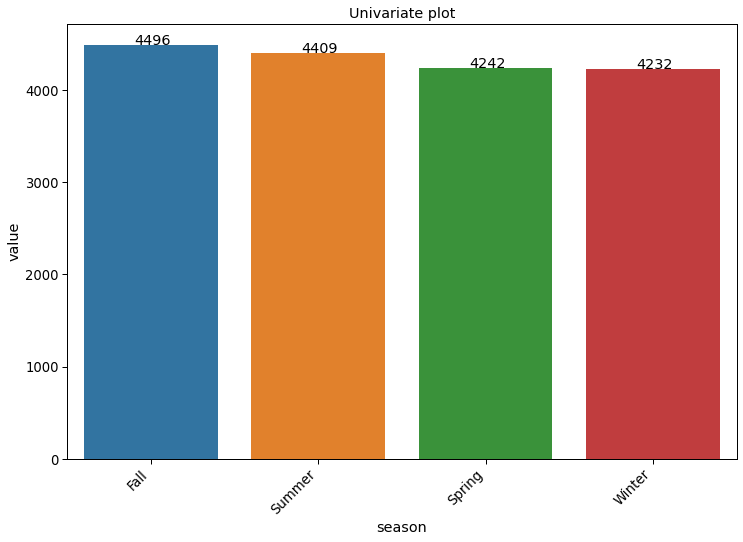

In [25]:
uni_categorical(df1[['season']],'S')

We can see that the distributions are approximately equal.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' yr ' 
       Count  Percentage
2012   8734       50.26
2011   8645       49.74


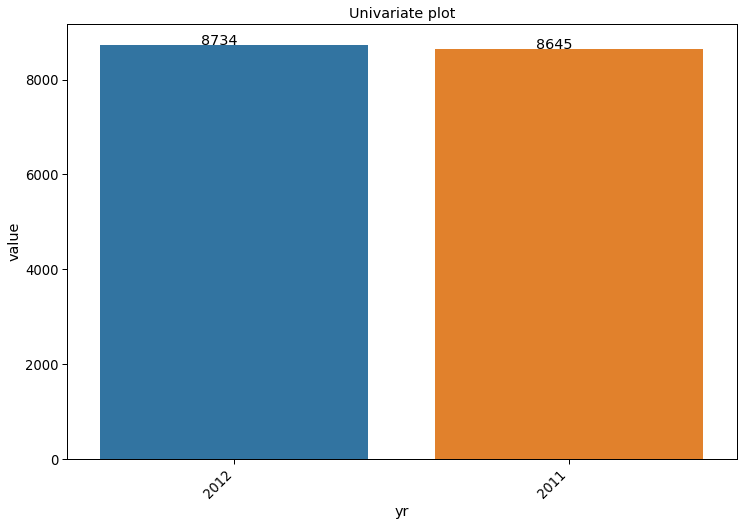

In [26]:
uni_categorical(df1[['yr']],'S')

We can see that the distributions are approximately equal.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' mnth ' 
      Count  Percentage
Jul   1488        8.56
May   1488        8.56
Dec   1483        8.53
Aug   1475        8.49
Mar   1473        8.48
Oct   1451        8.35
Jun   1440        8.29
Apr   1437        8.27
Nov   1437        8.27
Sep   1437        8.27
Jan   1429        8.22
Feb   1341        7.72


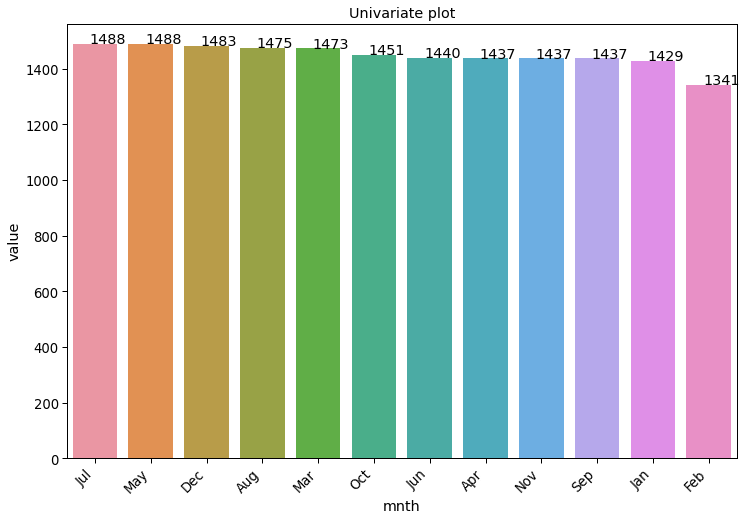

In [27]:
uni_categorical(df1[['mnth']],'S')

We can see that the distributions are approximately equal, with February having the least data points.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' holiday ' 
      Count  Percentage
No   16879       97.12
Yes    500        2.88


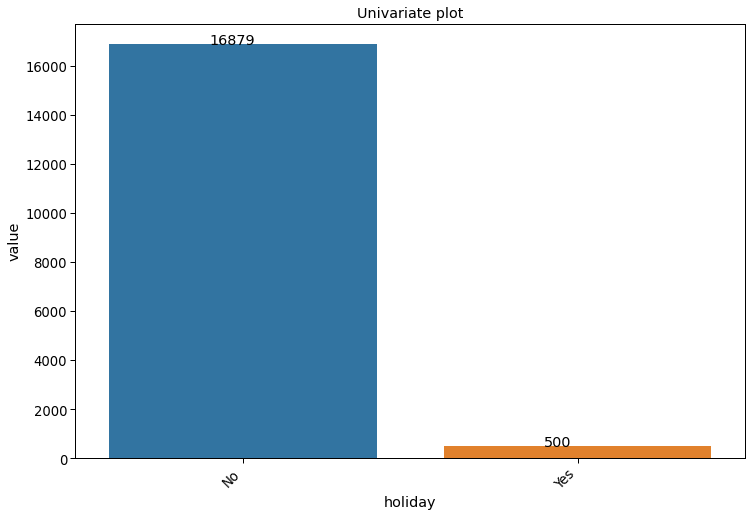

In [28]:
uni_categorical(df1[['holiday']],'S')

We can see that most data points fall into not a holiday category.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' weekday ' 
            Count  Percentage
Sunday      2512       14.45
Monday      2502       14.40
Saturday    2487       14.31
Tuesday     2479       14.26
Thursday    2475       14.24
Friday      2471       14.22
Wednesday   2453       14.11


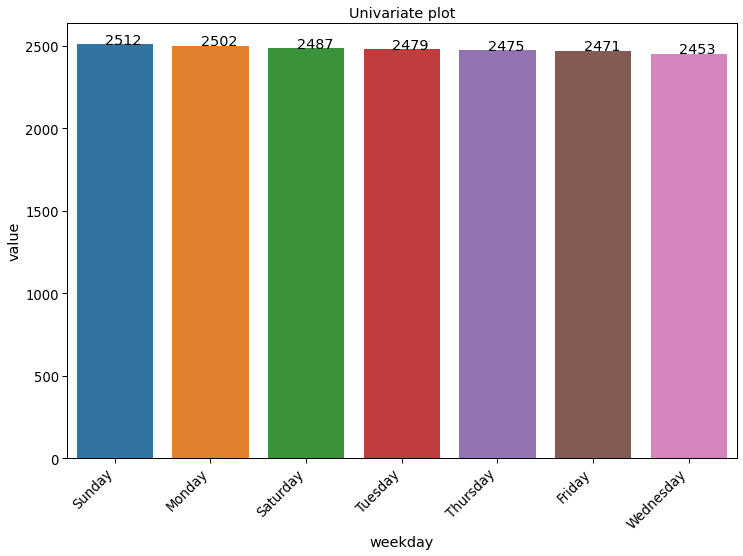

In [29]:
uni_categorical(df1[['weekday']],'S')

We can see that the distributions are approximately equal.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' workingday ' 
      Count  Percentage
Yes  11865       68.27
No    5514       31.73


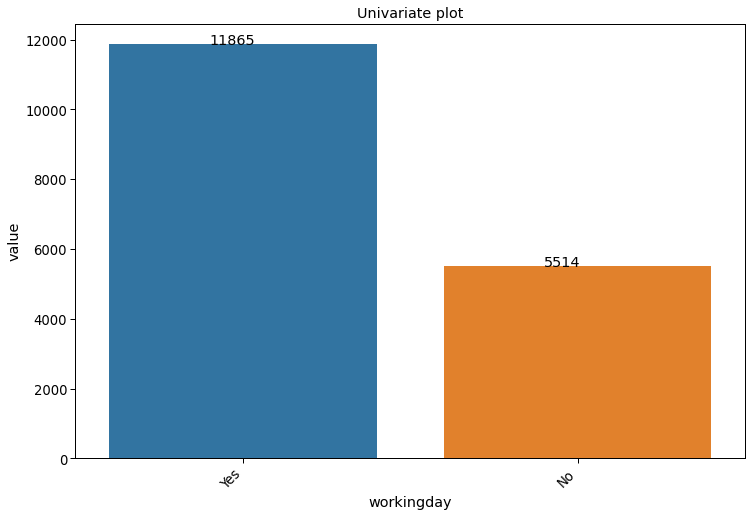

In [30]:
uni_categorical(df1[['workingday']],'S')

We can see that 2/3 of data points fall into working days category.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' weathersit ' 
                                                     Count  Percentage
Clear, Few clouds, Partly cloudy                    11413       65.67
Mist + Cloudy, Mist + Broken clouds, Mist + Few...   4544       26.15
Light Snow, Light Rain + Thunderstorm + Scatter...   1419        8.17
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      3        0.02


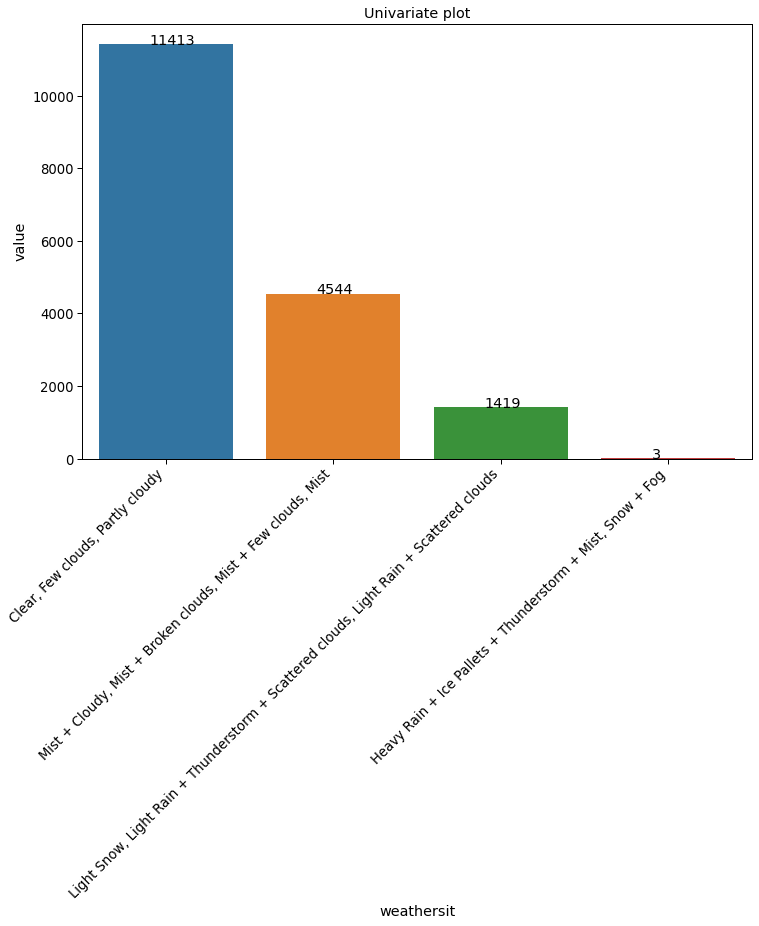

In [31]:
uni_categorical(df1[['weathersit']],'S')

We can see that most data points fall into the 'Clear, Few clouds, Partly cloudy' category, with 'Heavy Rain + Ice Pallets + Thunderstorm + Mist,... ' having the least data points.

In [32]:
#### Looking at numerical features:

############### Univariate analysis - Numerical ###############

This is univariate analysis for ' temp ' 
 count                        17379.0
mean                        0.496987
std                         0.192556
min                             0.02
25%                             0.34
50%                              0.5
75%                             0.66
max                              1.0
variance                    0.037078
IQR                             0.32
range                           0.98
skewness                   -0.006021
kurtosis                   -0.941844
mode        0    0.62
dtype: float64
Name: temp, dtype: object


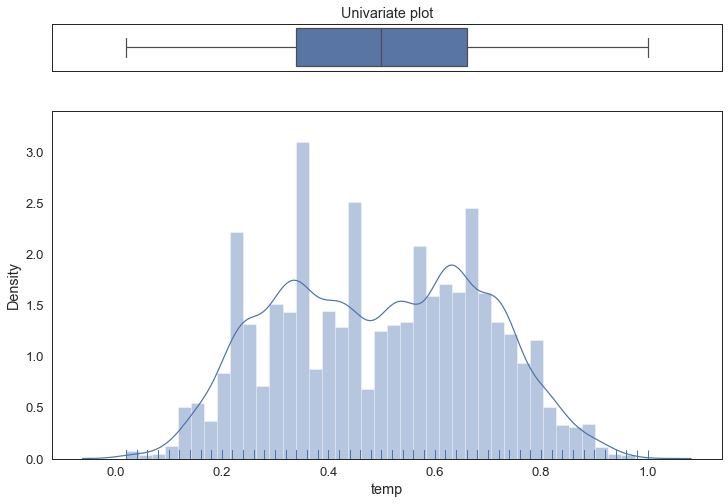

Kolmogorov's Statistics=0.545, p=0.000
Normality's test result: Sample does not look Gaussian (reject H0)


In [33]:
uni_numerical(df1[['temp']])

############### Univariate analysis - Numerical ###############

This is univariate analysis for ' temp ' 
 count                        17379.0
mean                        0.496987
std                         0.192556
min                             0.02
25%                             0.34
50%                              0.5
75%                             0.66
max                              1.0
variance                    0.037078
IQR                             0.32
range                           0.98
skewness                   -0.006021
kurtosis                   -0.941844
mode        0    0.62
dtype: float64
Name: temp, dtype: object


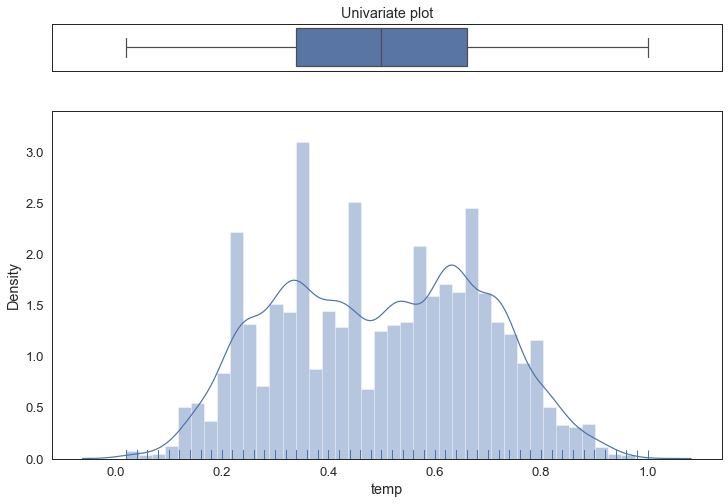

Kolmogorov's Statistics=0.545, p=0.000
Normality's test result: Sample does not look Gaussian (reject H0)


In [34]:
uni_numerical(df1[['temp']])

############### Univariate analysis - Numerical ###############

This is univariate analysis for ' atemp ' 
 count                          17379.0
mean                          0.475775
std                            0.17185
min                                0.0
25%                             0.3333
50%                             0.4848
75%                             0.6212
max                                1.0
variance                      0.029532
IQR                             0.2879
range                              1.0
skewness                     -0.090429
kurtosis                     -0.845412
mode        0    0.6212
dtype: float64
Name: atemp, dtype: object


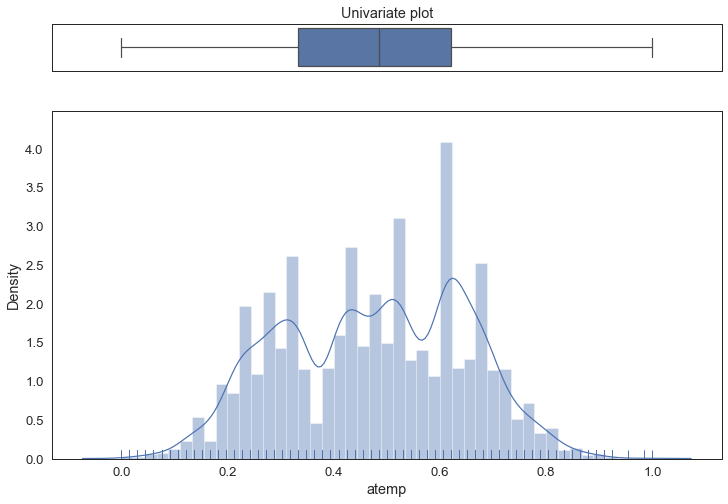

Kolmogorov's Statistics=0.544, p=0.000
Normality's test result: Sample does not look Gaussian (reject H0)


In [35]:
uni_numerical(df1[['atemp']])

############### Univariate analysis - Numerical ###############

This is univariate analysis for ' hum ' 
 count                        17379.0
mean                        0.627229
std                          0.19293
min                              0.0
25%                             0.48
50%                             0.63
75%                             0.78
max                              1.0
variance                    0.037222
IQR                              0.3
range                            1.0
skewness                   -0.111287
kurtosis                   -0.826117
mode        0    0.88
dtype: float64
Name: hum, dtype: object


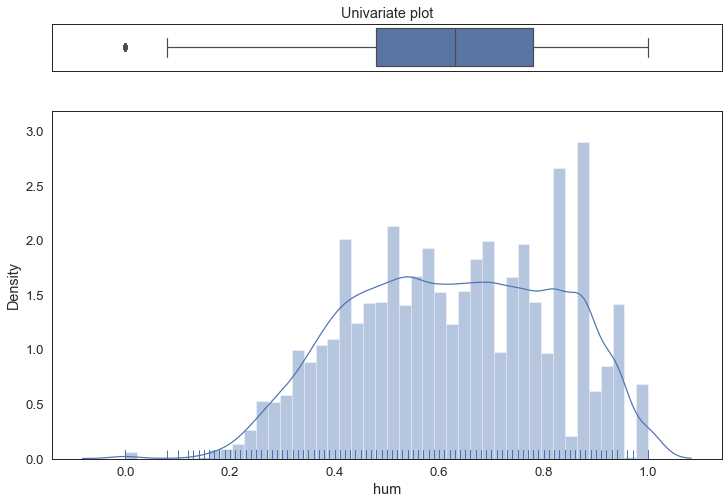

Kolmogorov's Statistics=0.585, p=0.000
Normality's test result: Sample does not look Gaussian (reject H0)


In [36]:
uni_numerical(df1[['hum']])

############### Univariate analysis - Numerical ###############

This is univariate analysis for ' windspeed ' 
 count                       17379.0
mean                       0.190098
std                         0.12234
min                             0.0
25%                          0.1045
50%                           0.194
75%                          0.2537
max                          0.8507
variance                   0.014967
IQR                          0.1492
range                        0.8507
skewness                   0.574905
kurtosis                    0.59082
mode        0    0.0
dtype: float64
Name: windspeed, dtype: object


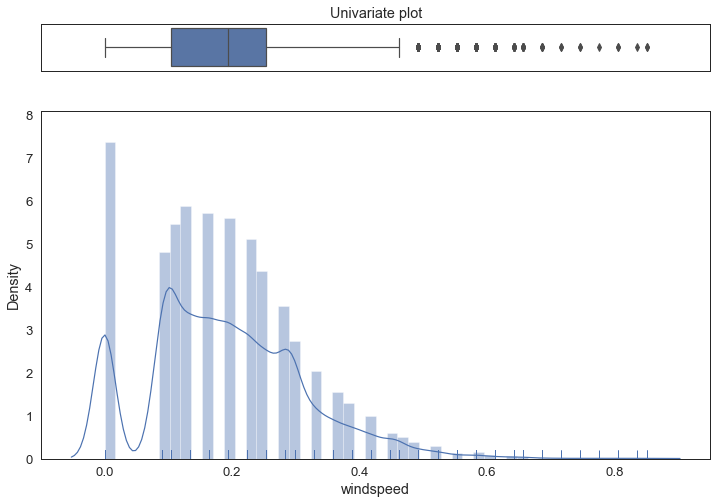

Kolmogorov's Statistics=0.500, p=0.000
Normality's test result: Sample does not look Gaussian (reject H0)


In [37]:
uni_numerical(df1[['windspeed']])

############### Univariate analysis - Numerical ###############

This is univariate analysis for ' casual ' 
 count                   17379.0
mean                  35.676218
std                    49.30503
min                         0.0
25%                         4.0
50%                        17.0
75%                        48.0
max                       367.0
variance            2430.986021
IQR                        44.0
range                     367.0
skewness               2.499237
kurtosis               7.571002
mode        0    0
dtype: int64
Name: casual, dtype: object


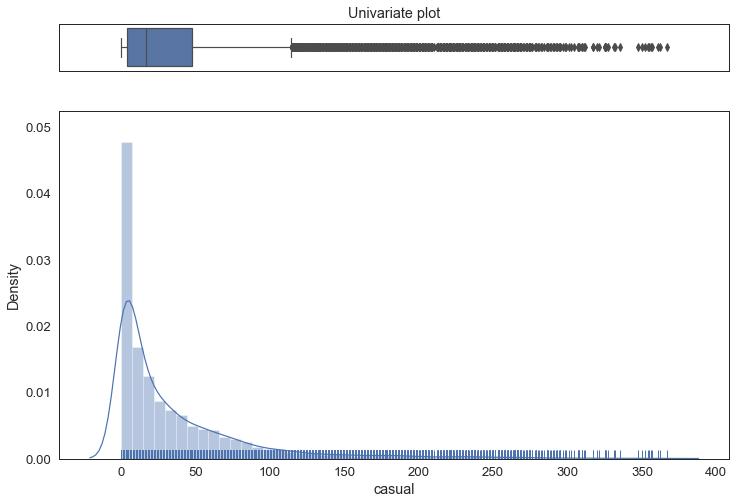

Kolmogorov's Statistics=0.824, p=0.000
Normality's test result: Sample does not look Gaussian (reject H0)


In [38]:
uni_numerical(df1[['casual']])

############### Univariate analysis - Numerical ###############

This is univariate analysis for ' registered ' 
 count                   17379.0
mean                 153.786869
std                  151.357286
min                         0.0
25%                        34.0
50%                       115.0
75%                       220.0
max                       886.0
variance           22909.027999
IQR                       186.0
range                     886.0
skewness               1.557904
kurtosis               2.750018
mode        0    4
dtype: int64
Name: registered, dtype: object


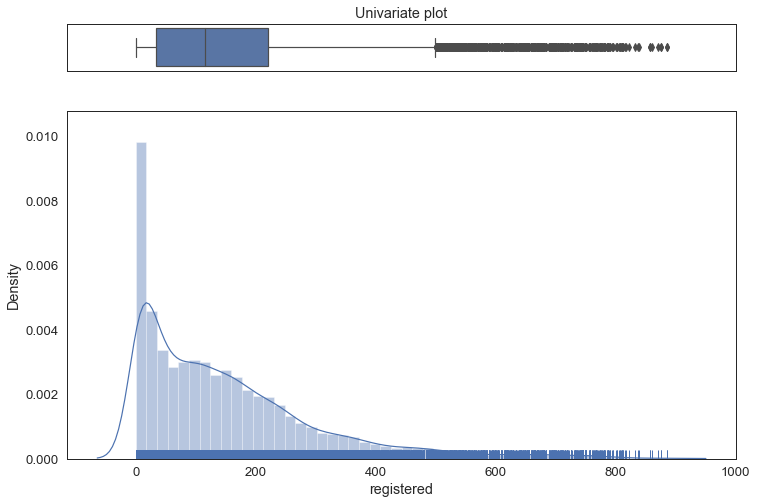

Kolmogorov's Statistics=0.972, p=0.000
Normality's test result: Sample does not look Gaussian (reject H0)


In [39]:
uni_numerical(df1[['registered']])

############### Univariate analysis - Numerical ###############

This is univariate analysis for ' cnt ' 
 count                   17379.0
mean                 189.463088
std                  181.387599
min                         1.0
25%                        40.0
50%                       142.0
75%                       281.0
max                       977.0
variance           32901.461104
IQR                       241.0
range                     976.0
skewness               1.277412
kurtosis               1.417203
mode        0    5
dtype: int64
Name: cnt, dtype: object


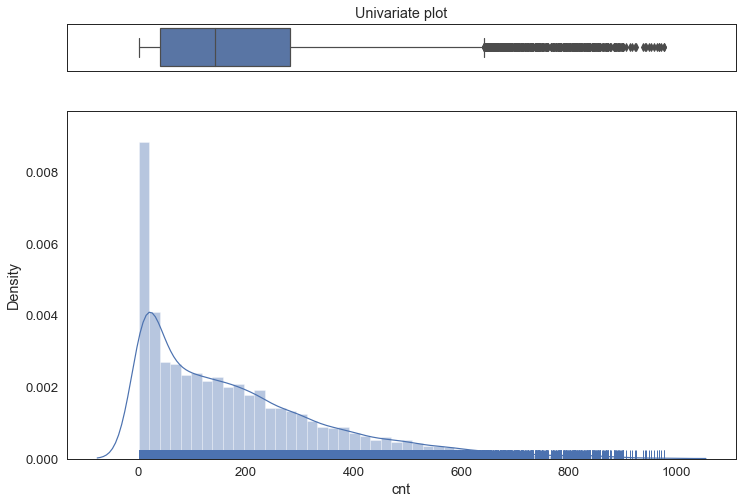

Kolmogorov's Statistics=0.978, p=0.000
Normality's test result: Sample does not look Gaussian (reject H0)


In [40]:
uni_numerical(df1[['cnt']])

We see a highly-right skewed distribution with the mode being 5.

Applying log:

############### Univariate analysis - Numerical ###############

This is univariate analysis for ' y transform ' 
 count                            17379.0
mean                            4.536082
std                             1.486137
min                                  0.0
25%                             3.688879
50%                             4.955827
75%                             5.638355
max                             6.884487
variance                        2.208604
IQR                             1.949475
range                           6.884487
skewness                       -0.936182
kurtosis                        0.174589
mode        0    1.609438
dtype: float64
Name: y transform, dtype: object


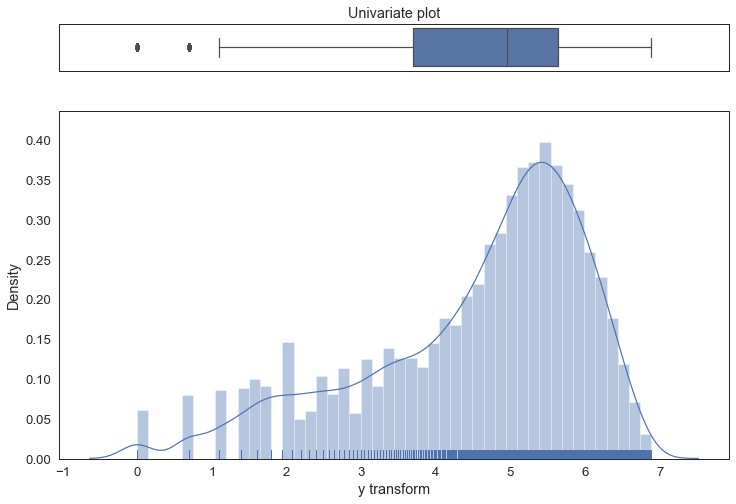

Kolmogorov's Statistics=0.901, p=0.000
Normality's test result: Sample does not look Gaussian (reject H0)


In [41]:
df1['y transform']= np.log(df1['cnt'])  
uni_numerical(df1[['y transform']])

df1.drop(['y transform'],axis=1,inplace=True)

We see that the skewness value dropped from 1.277412 to -0.936182, making it left-skewed,but more proximal to the bell shape, although it is still not normal. Applying the log to the feature in the dataset:

In [42]:
#df1['cnt'] = np.log(df1['cnt']) #exploratory df
df['cnt'] = np.log(df['cnt']) #model df

### Bivariate Analysis

##### Looking at Datetime features:

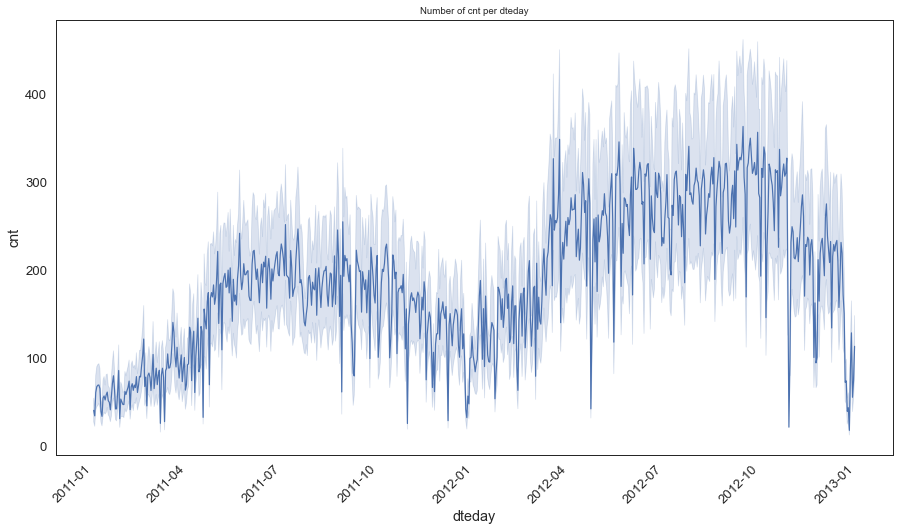

In [43]:
bi_categorical_datetime_cont(df1,'dteday','cnt','N')

We can see that there is a trend of increase in numbers of users until approximately October/2012 when a decrease begins.

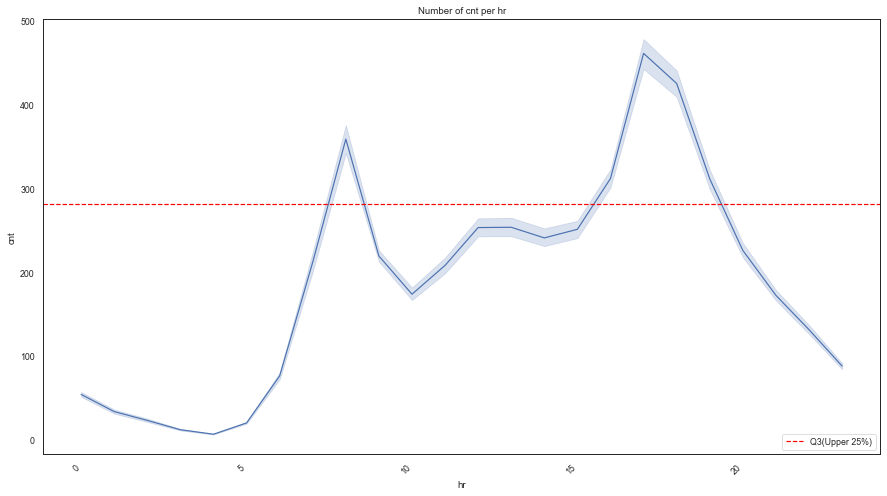

In [44]:
bi_categorical_datetime_cont(df1,'hr','cnt','Y')

We can see that the peak hours are around 8 and from 16 to 19 hours. A new feature will be created to flag peak hours.

In [45]:
peak = [8,16,17,18,19]
df1['peak']=df1['hr'].apply(lambda x: 'Yes' if x in peak else 'No' )
df['peak']=df['hr'].apply(lambda x: 1 if x in peak else 0 )

Looking at the distribution of peak:

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' peak ' 
      Count  Percentage
No   13736       79.04
Yes   3643       20.96


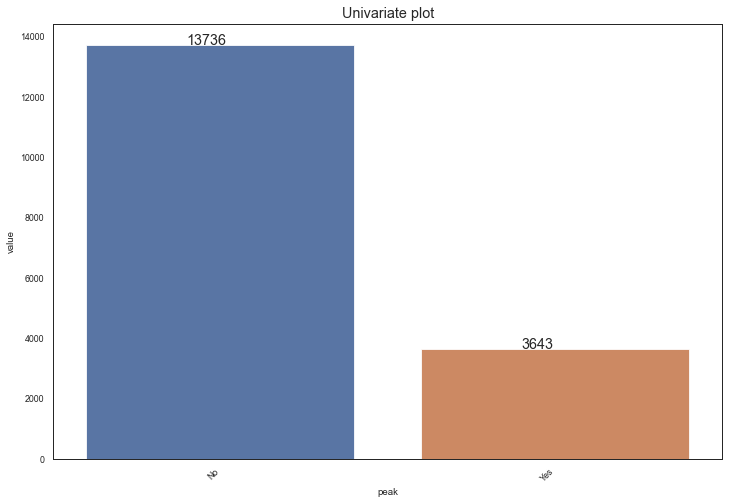

In [46]:
uni_categorical(df1[['peak']],'S')

#### Looking at target x categorical features:

We can see that there are difference between the groups distributions and this is confirmed by Kruskal's test.

############### Bivariate analysis - Categorical x Numerical ###############

*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test



This is ANOVA/Kruskal for cnt and season 

One-way ANOVA Assumptions
 In order to run a one-way ANOVA the following assumptions must be met:
 1.The response of interest is continuous and normally distributed for each treatment group.
 	CLT :
 		If looks normal each group must have more than 30 observations – no need for Normality’s test;
 		If moderately skewed(|0.5| < skewness < |1.0|), each group must have more than 100 observations – no need for Normality’s test;
	*If not normal, proceed to Kruskal test.
 2.Treatment groups are independent of one another. 
 3.There are no major outliers.
 4.A check for unequal variances will help determine which version of a one-way ANOVA is most appropriate (Levene’s test, Null hypothesis: variances are equal between groups):
 	A .If variances are equal, then the assumptions of a s

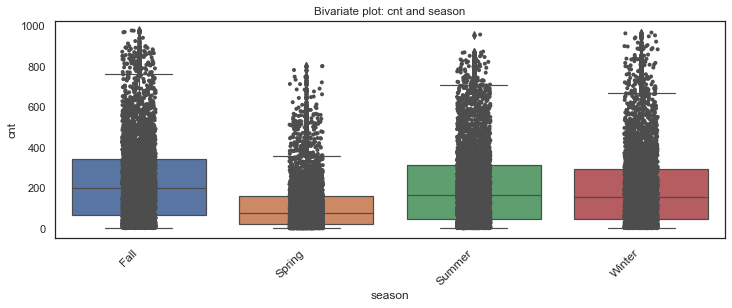


Levene's Statistics=324.500, p=0.000
Levene's test result: Unequal variances (reject H0)

Kruskal's Statistics(unequal variances)=1190.269, p=0.000

Kruskal's Null hypothesis: All sample distributions are equal.
Kruskal's test result: One or more sample distributions are not equal. (reject H0)





In [47]:
target='cnt'
bi_categorical_cont(df1[['season',target]],target,'S')

We can see that there are difference between the groups distributions and this is confirmed by Kruskal's test.

############### Bivariate analysis - Categorical x Numerical ###############

*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test



This is Mann-Whitney U test for cnt and yr

Mann-Whitney U test:
 Null hypothesis: The distribution of scores for the two groups are equal.
 Assumptions:
 1.Dependent variable that is measured at the continuous or ordinal level.
 2.Groups are independent of one another. 
 3.What's the shape of each group distribution.
	 a) Similar shapes: 
		 Alternative hypothesis: the medians of the two groups are not equal.
	 b) Different shapes:
		 Alternative hypothesis: the distribution of scores for the two groups are not equal.

Summary:
         N     Mean       SD     SE  95% Conf.  Interval
yr                                                      
2011  8645  143.794  133.798  1.439    140.974   146.615
2012  8734  234.666  208.911  2.235    230.284   239.048


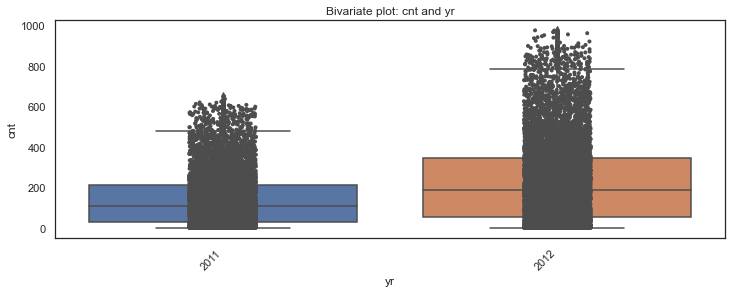


Levene's Statistics=1192.275, p=0.000
Levene's test result: Unequal variances (reject H0)

Mann-Whitney U 's Statistics (unequal variances)=28707153.500, p=0.000

Mann-Whitney U 's Null hypothesis: The distribution of scores for the two groups are equal.
Mann-Whitney U 's test result: The distribution of scores for the two groups are not equal. (reject H0)





In [48]:
bi_categorical_cont(df1[['yr',target]],target,'S')

We can see that there are difference between the groups distributions and this is confirmed by Mann-Whitney U 's test.

############### Bivariate analysis - Categorical x Numerical ###############

*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test



This is ANOVA/Kruskal for cnt and mnth 

One-way ANOVA Assumptions
 In order to run a one-way ANOVA the following assumptions must be met:
 1.The response of interest is continuous and normally distributed for each treatment group.
 	CLT :
 		If looks normal each group must have more than 30 observations – no need for Normality’s test;
 		If moderately skewed(|0.5| < skewness < |1.0|), each group must have more than 100 observations – no need for Normality’s test;
	*If not normal, proceed to Kruskal test.
 2.Treatment groups are independent of one another. 
 3.There are no major outliers.
 4.A check for unequal variances will help determine which version of a one-way ANOVA is most appropriate (Levene’s test, Null hypothesis: variances are equal between groups):
 	A .If variances are equal, then the assumptions of a sta

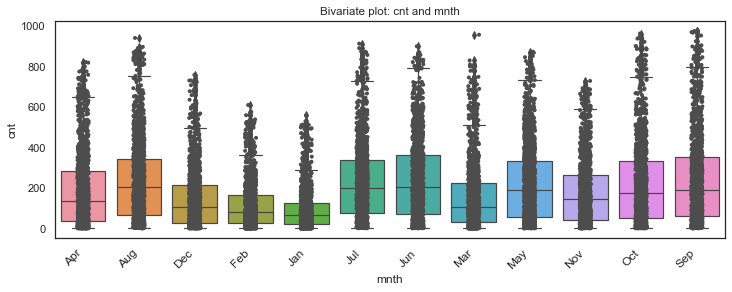


Levene's Statistics=102.025, p=0.000
Levene's test result: Unequal variances (reject H0)

Kruskal's Statistics(unequal variances)=1290.516, p=0.000

Kruskal's Null hypothesis: All sample distributions are equal.
Kruskal's test result: One or more sample distributions are not equal. (reject H0)





In [49]:
bi_categorical_cont(df1[['mnth',target]],target,'S')

We can see that there are difference between the groups distributions and this is confirmed by Kruskal's test.

############### Bivariate analysis - Categorical x Numerical ###############

*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test



This is ANOVA/Kruskal for cnt and hr 

One-way ANOVA Assumptions
 In order to run a one-way ANOVA the following assumptions must be met:
 1.The response of interest is continuous and normally distributed for each treatment group.
 	CLT :
 		If looks normal each group must have more than 30 observations – no need for Normality’s test;
 		If moderately skewed(|0.5| < skewness < |1.0|), each group must have more than 100 observations – no need for Normality’s test;
	*If not normal, proceed to Kruskal test.
 2.Treatment groups are independent of one another. 
 3.There are no major outliers.
 4.A check for unequal variances will help determine which version of a one-way ANOVA is most appropriate (Levene’s test, Null hypothesis: variances are equal between groups):
 	A .If variances are equal, then the assumptions of a stand

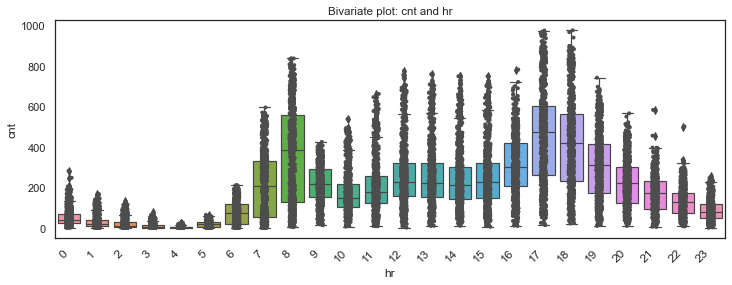


Levene's Statistics=437.247, p=0.000
Levene's test result: Unequal variances (reject H0)

Kruskal's Statistics(unequal variances)=10973.041, p=0.000

Kruskal's Null hypothesis: All sample distributions are equal.
Kruskal's test result: One or more sample distributions are not equal. (reject H0)





In [50]:
bi_categorical_cont(df1[['hr',target]],target,'S')

We can see that there are difference between the groups distributions and this is confirmed by Kruskal's test.

############### Bivariate analysis - Categorical x Numerical ###############

*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test



This is Mann-Whitney U test for cnt and holiday

Mann-Whitney U test:
 Null hypothesis: The distribution of scores for the two groups are equal.
 Assumptions:
 1.Dependent variable that is measured at the continuous or ordinal level.
 2.Groups are independent of one another. 
 3.What's the shape of each group distribution.
	 a) Similar shapes: 
		 Alternative hypothesis: the medians of the two groups are not equal.
	 b) Different shapes:
		 Alternative hypothesis: the distribution of scores for the two groups are not equal.

Summary:
             N     Mean       SD     SE  95% Conf.  Interval
holiday                                                     
No       16879  190.429  181.981  1.401    187.683   193.174
Yes        500  156.870  156.757  7.010    143.096   170.644


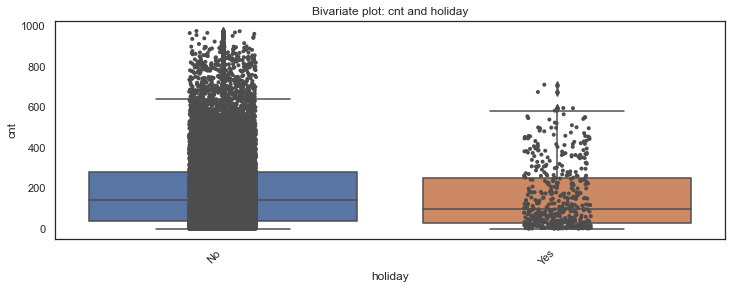


Levene's Statistics=8.318, p=0.004
Levene's test result: Unequal variances (reject H0)

Mann-Whitney U 's Statistics (unequal variances)=4650072.500, p=0.000

Mann-Whitney U 's Null hypothesis: The distribution of scores for the two groups are equal.
Mann-Whitney U 's test result: The distribution of scores for the two groups are not equal. (reject H0)





In [51]:
bi_categorical_cont(df1[['holiday',target]],target,'S')

We can see that there are difference between the groups distributions and this is confirmed by Mann-Whitney U 's test.

############### Bivariate analysis - Categorical x Numerical ###############

*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test



This is ANOVA/Kruskal for cnt and weekday 

One-way ANOVA Assumptions
 In order to run a one-way ANOVA the following assumptions must be met:
 1.The response of interest is continuous and normally distributed for each treatment group.
 	CLT :
 		If looks normal each group must have more than 30 observations – no need for Normality’s test;
 		If moderately skewed(|0.5| < skewness < |1.0|), each group must have more than 100 observations – no need for Normality’s test;
	*If not normal, proceed to Kruskal test.
 2.Treatment groups are independent of one another. 
 3.There are no major outliers.
 4.A check for unequal variances will help determine which version of a one-way ANOVA is most appropriate (Levene’s test, Null hypothesis: variances are equal between groups):
 	A .If variances are equal, then the assumptions of a 

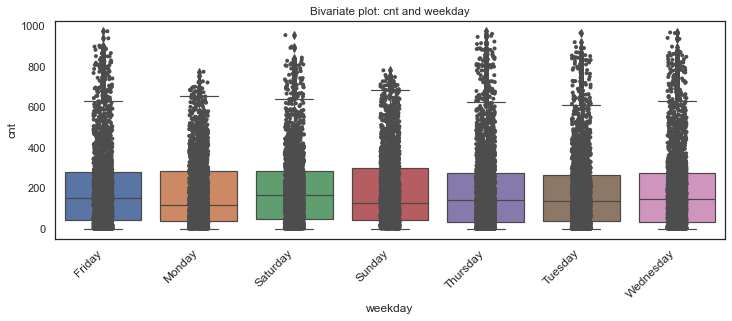


Levene's Statistics=2.272, p=0.034
Levene's test result: Unequal variances (reject H0)

Kruskal's Statistics(unequal variances)=24.584, p=0.000

Kruskal's Null hypothesis: All sample distributions are equal.
Kruskal's test result: One or more sample distributions are not equal. (reject H0)





In [52]:
bi_categorical_cont(df1[['weekday',target]],target,'S')

We can see that there are difference between the groups distributions and this is confirmed by Kruskal's test.

############### Bivariate analysis - Categorical x Numerical ###############

*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test



This is Mann-Whitney U test for cnt and workingday

Mann-Whitney U test:
 Null hypothesis: The distribution of scores for the two groups are equal.
 Assumptions:
 1.Dependent variable that is measured at the continuous or ordinal level.
 2.Groups are independent of one another. 
 3.What's the shape of each group distribution.
	 a) Similar shapes: 
		 Alternative hypothesis: the medians of the two groups are not equal.
	 b) Different shapes:
		 Alternative hypothesis: the distribution of scores for the two groups are not equal.

Summary:
                N     Mean       SD     SE  95% Conf.  Interval
workingday                                                     
No           5514  181.405  172.854  2.328    176.842   185.969
Yes         11865  193.208  185.107  1.699    189.877   196.539


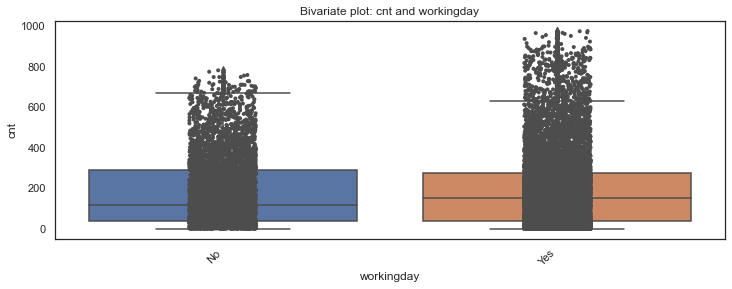


Levene's Statistics=2.739, p=0.098
Levene's test result: Equal variances (fail to reject H0)

Mann-Whitney U 's Null hypothesis: The distribution of scores for the two groups are equal.

Mann-Whitney U 's Statistics (equal variances)=31858297.000, p=0.006
Mann-Whitney U 's test result: The medians of the two groups are not equal. (reject H0)





In [53]:
bi_categorical_cont(df1[['workingday',target]],target,'S')

We can see that there are difference between the groups distributions and this is confirmed by Mann-Whitney U 's test.

############### Bivariate analysis - Categorical x Numerical ###############

*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test



This is ANOVA/Kruskal for cnt and weathersit 

One-way ANOVA Assumptions
 In order to run a one-way ANOVA the following assumptions must be met:
 1.The response of interest is continuous and normally distributed for each treatment group.
 	CLT :
 		If looks normal each group must have more than 30 observations – no need for Normality’s test;
 		If moderately skewed(|0.5| < skewness < |1.0|), each group must have more than 100 observations – no need for Normality’s test;
	*If not normal, proceed to Kruskal test.
 2.Treatment groups are independent of one another. 
 3.There are no major outliers.
 4.A check for unequal variances will help determine which version of a one-way ANOVA is most appropriate (Levene’s test, Null hypothesis: variances are equal between groups):
 	A .If variances are equal, then the assumptions of

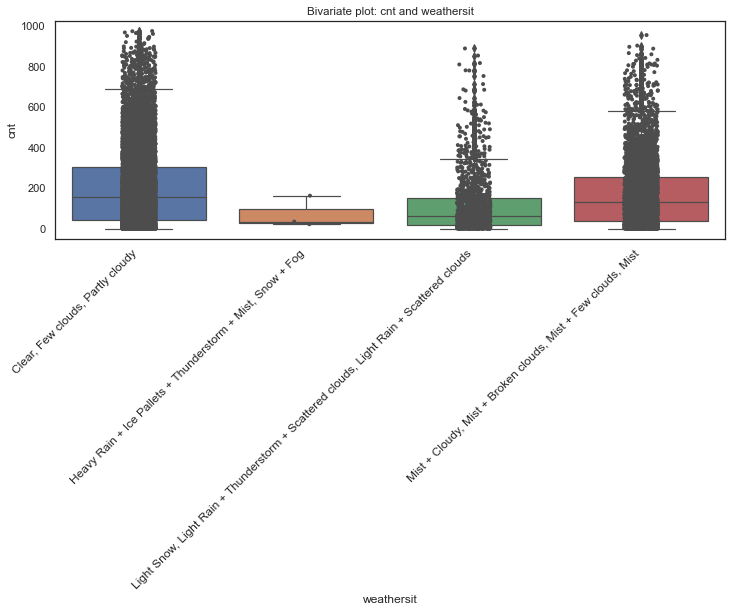


Levene's Statistics=107.710, p=0.000
Levene's test result: Unequal variances (reject H0)

Kruskal's Statistics(unequal variances)=397.031, p=0.000

Kruskal's Null hypothesis: All sample distributions are equal.
Kruskal's test result: One or more sample distributions are not equal. (reject H0)





In [54]:
bi_categorical_cont(df1[['weathersit',target]],target,'S')

We can see that there are difference between the groups distributions and this is confirmed by Kruskal's test.

############### Bivariate analysis - Categorical x Numerical ###############

*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test



This is Mann-Whitney U test for cnt and peak

Mann-Whitney U test:
 Null hypothesis: The distribution of scores for the two groups are equal.
 Assumptions:
 1.Dependent variable that is measured at the continuous or ordinal level.
 2.Groups are independent of one another. 
 3.What's the shape of each group distribution.
	 a) Similar shapes: 
		 Alternative hypothesis: the medians of the two groups are not equal.
	 b) Different shapes:
		 Alternative hypothesis: the distribution of scores for the two groups are not equal.

Summary:
          N     Mean       SD     SE  95% Conf.  Interval
peak                                                     
No    13736  140.544  135.006  1.152    138.286   142.802
Yes    3643  373.914  212.593  3.522    367.009   380.820


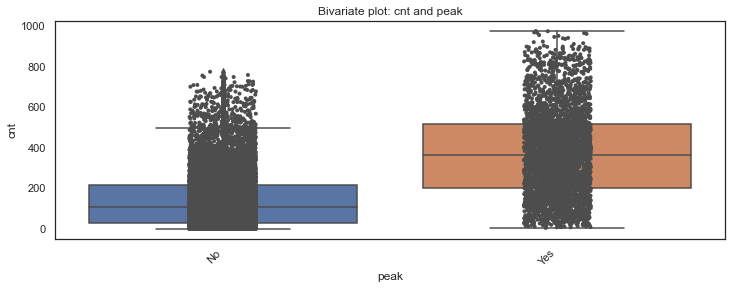


Levene's Statistics=1454.202, p=0.000
Levene's test result: Unequal variances (reject H0)

Mann-Whitney U 's Statistics (unequal variances)=8591911.000, p=0.000

Mann-Whitney U 's Null hypothesis: The distribution of scores for the two groups are equal.
Mann-Whitney U 's test result: The distribution of scores for the two groups are not equal. (reject H0)





In [55]:
bi_categorical_cont(df1[['peak',target]],target,'S')

############### Bivariate analysis - Numerical x Numerical ###############

Correlation (how strong the correlation is):
 Null hypothesis: there’s no association between variables.
 	1.Normal distribution for both variables for pearson;
  	2.homoscedasticity assumes that data is equally distributed about the regression line.
 	3.Linear? 
 		Linear: pearson
 		Monotonically related (not normal): spearman kendall hoeffding 



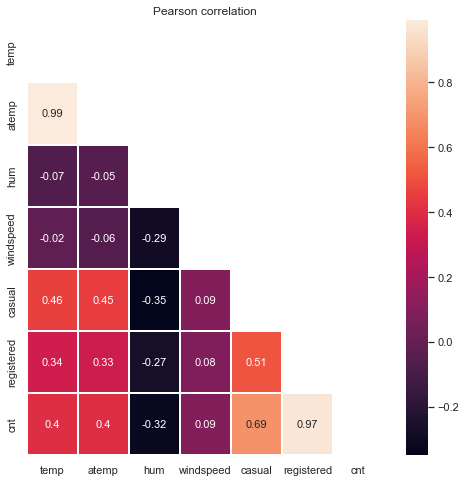

In [56]:
bi_numerical_num(df1)

We can see that,as expected, there are a high correlation between atemp ('feels like') temperature and temp (temperature) as well between registered and casual users and total numbers.

### Dropping features:

In [57]:
# Copy of df:
df2 = df.copy()

#Dropping 'instant', 'dteday':
df2.drop(['instant', 'dteday' ],axis=1,inplace=True)
df2

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,peak
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,2.772589,0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,3.688879,0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,3.465736,0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,2.564949,0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,4.779123,1
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,4.488636,0
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,4.499810,0
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,4.110874,0


### Separating predictors and target:

In [58]:
target='cnt'#'registered'
X = df2.drop([target],axis=1)
y = df2[target]

Looking at the first observations of predictors and target: 

In [59]:
print(X.head(3))

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   

    atemp   hum  windspeed  casual  registered  peak  
0  0.2879  0.81        0.0       3          13     0  
1  0.2727  0.80        0.0       8          32     0  
2  0.2727  0.80        0.0       5          27     0  


In [60]:
print(y.head(3))

0    2.772589
1    3.688879
2    3.465736
Name: cnt, dtype: float64


### Verifying collinearity

############### Bivariate analysis - Numerical x Numerical ###############

Correlation (how strong the correlation is):
 Null hypothesis: there’s no association between variables.
 	1.Normal distribution for both variables for pearson;
  	2.homoscedasticity assumes that data is equally distributed about the regression line.
 	3.Linear? 
 		Linear: pearson
 		Monotonically related (not normal): spearman kendall hoeffding 



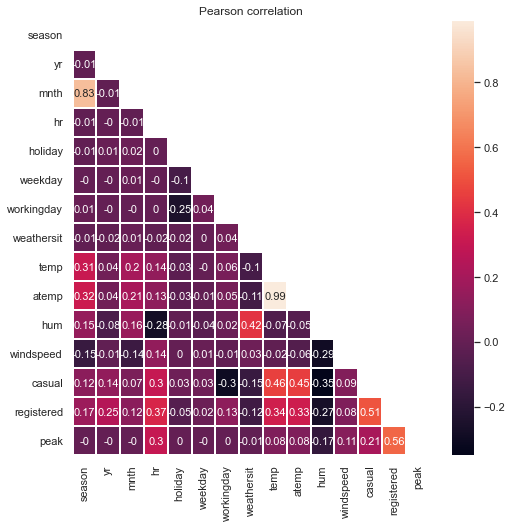

In [61]:
bi_numerical_num(X)

We see that most of the features are not linearly correlated, the highest correlation value is 0.83 between Month (mnth) and Season.

# Models

In [62]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=6,test_size=0.3)

In [63]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

## Fitting OLS:

#### Applying the OLS

Using Ordinary Least Squares:

In [64]:
X1 = sm.add_constant(X_train)
X1.head()
ols = sm.OLS(y_train,X1) 
lr = ols.fit()
print(lr.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2250.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:16:12   Log-Likelihood:                -13994.
No. Observations:               12165   AIC:                         2.802e+04
Df Residuals:                   12149   BIC:                         2.814e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6946      0.046     58.454      0.0

Applying Backward Feature elimination:

In [65]:
#Backward Feature Elimination 
maxp = lr.pvalues.max()
while(maxp > 0.025):
    X1.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y_train,X1) #X1..astype(float)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())    

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3067.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:16:13   Log-Likelihood:                -13998.
No. Observations:               12165   AIC:                         2.802e+04
Df Residuals:                   12153   BIC:                         2.811e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7078      0.043     62.422      0.0

### Testing the model:

In [66]:
X_names = X1.columns
X_names = X_names.drop(['const'])
X_test1=X_test[X_names]
X_test1 = sm.add_constant(X_test1)

In [67]:
actual = y_test
predicted = lr.predict(X_test1)
print('Root Mean Square error(RMSE) MLR',sqrt(mean_squared_error(actual,predicted)))

Root Mean Square error(RMSE) MLR 0.7696579287788499


We see:

    - An R-Squared value of approximatelly 0.73, meaning that the independent variable (X) would explain  approximatelly 73% of the variation of the y(Count of Cases); 
    - An Adjusted R-Squared value of approximatelly 0.73, meaning that the independent variables  explaing  approximately 73% of the variation of the y(Count);
    - Finally we have a RMSE value of approximately 94, meaning that the average of the errors are around 0.76 units of the expected value.

#### k-fold cross validation using linear regression model:

In [68]:
X,y = shuffle(X,y,random_state=0)
cross = cross_val_score(LinearRegression(),X,y)
print('Mean Cross validation score is:',cross.mean())
print('Minimum Cross validation score is:', cross.min())
print('Maximum Cross validation score is:', cross.max())

Mean Cross validation score is: 0.7339440357219831
Minimum Cross validation score is: 0.7292915826850399
Maximum Cross validation score is: 0.7385200839112014


## Coefficient Plot :

In [69]:
#values:
dict(lr.params)

{'const': 2.707844247667299,
 'season': 0.05028778989066761,
 'yr': -0.054912879824554936,
 'hr': 0.06230878782608691,
 'workingday': -0.16215073927943982,
 'weathersit': 0.04089397767099072,
 'atemp': 0.7071032143819121,
 'hum': -0.48300821056939813,
 'windspeed': 0.16335486092672455,
 'casual': 0.0035290891999894213,
 'registered': 0.006048703879468651,
 'peak': -0.2662377124201991}

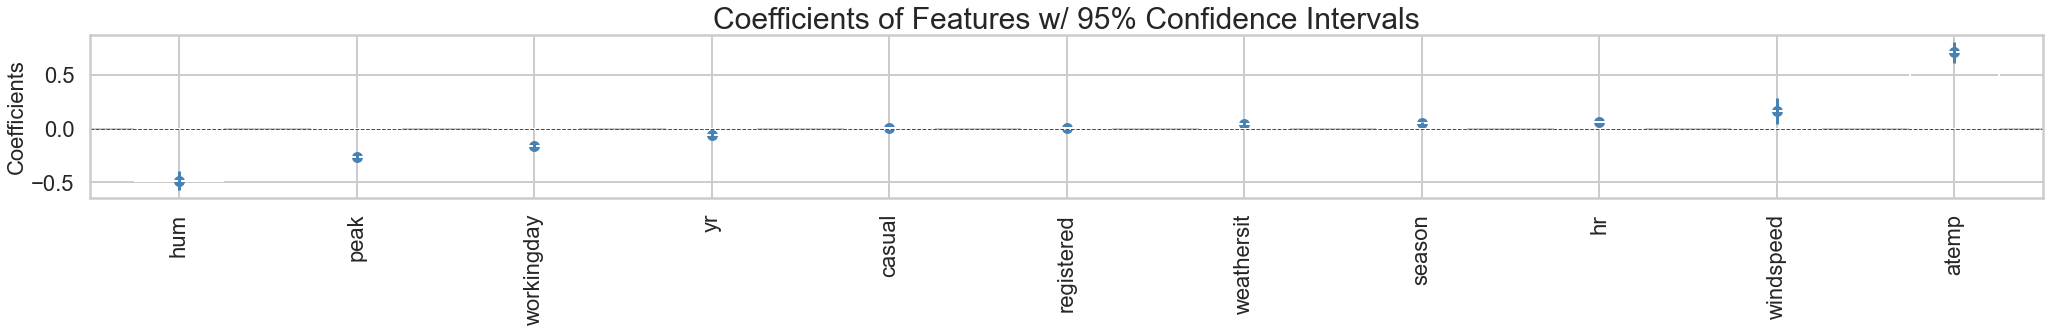

In [70]:
coefplot(lr)

## KNN:

In [71]:
knn = neighbors.KNeighborsRegressor()  # default no. of neighbors is 5
print('KNN score: %f' % knn.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

KNN score: 0.820152


In [72]:
actual = y_test
predicted = knn.predict(X_test_scaled)
print('Root Mean Square error(RMSE)',sqrt(mean_squared_error(actual,predicted)))

Root Mean Square error(RMSE) 0.6303845996609726


In [73]:
R2 = r2_score(actual,predicted)
print('Adj. R2 score for KNN: ',adjR2(X_test_scaled,R2))

Adj. R2 score for KNN:  0.8196335089088063


In [74]:
X,y = shuffle(X,y,random_state=0)
cross = cross_val_score(knn,X,y)
print('Mean Cross validation score is:',cross.mean())
print('Minimum Cross validation score is:', cross.min())
print('Maximum Cross validation score is:', cross.max())

Mean Cross validation score is: 0.9983212114300228
Minimum Cross validation score is: 0.9976922460873787
Maximum Cross validation score is: 0.9986977338997862


## Random Forest:

In [75]:
Forest = RandomForestRegressor(n_estimators=15) #number of trees in the forest
print('Random Forest score: %f' % Forest.fit(X_train, y_train).score(X_test, y_test))

Random Forest score: 0.999920


In [76]:
actual = y_test
predicted = Forest.predict(X_test)
print('Root Mean Square error(RMSE)',sqrt(mean_squared_error(actual,predicted)))

Root Mean Square error(RMSE) 0.013262939734516623


In [77]:
R2 = r2_score(actual,predicted)
print('Adj. R2 score for Random Forest:',adjR2(X_test,R2))

Adj. R2 score for Random Forest: 0.9999201593140741


In [78]:
X,y = shuffle(X,y,random_state=0)
cross = cross_val_score(Forest,X,y)
print('Mean Cross validation score is:',cross.mean())
print('Minimum Cross validation score is:', cross.min())
print('Maximum Cross validation score is:', cross.max())

Mean Cross validation score is: 0.9999191061305831
Minimum Cross validation score is: 0.9998737333156958
Maximum Cross validation score is: 0.9999451872988279


## AdaBoost: 

In [79]:
from sklearn.ensemble import AdaBoostRegressor
ADA = AdaBoostRegressor()
print('Adaboost score: %f' % ADA.fit(X_train, y_train).score(X_test, y_test))

Adaboost score: 0.983774


In [80]:
actual = y_test
predicted = ADA.predict(X_test)
print('Root Mean Square error(RMSE)',sqrt(mean_squared_error(actual,predicted)))

Root Mean Square error(RMSE) 0.189349518145856


In [81]:
R2 = r2_score(actual,predicted)
print('Adj. R2 score for AdaBoost:',adjR2(X_test,R2))

Adj. R2 score for AdaBoost: 0.9837267957490222


In [82]:
X,y = shuffle(X,y,random_state=0)
cross = cross_val_score(ADA,X,y)
print('Mean Cross validation score is:',cross.mean())
print('Minimum Cross validation score is:', cross.min())
print('Maximum Cross validation score is:', cross.max())

Mean Cross validation score is: 0.9840894252113612
Minimum Cross validation score is: 0.9819565505812102
Maximum Cross validation score is: 0.9860981834402986


## SVR: 

In [83]:
from sklearn.svm import SVR
S = SVR()#, epsilon=0.2
print('SVR score: %f' % S.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

SVR score: 0.928514


In [84]:
actual = y_test
predicted = S.predict(X_test_scaled)
print('Root Mean Square error(RMSE)',sqrt(mean_squared_error(actual,predicted)))

Root Mean Square error(RMSE) 0.3974337075079688


In [85]:
R2 = r2_score(actual,predicted)
print('Adj. R2 score for SVR:',adjR2(X_test,R2))

Adj. R2 score for SVR: 0.9283074441790884


In [86]:
X,y = shuffle(X,y,random_state=0)
cross = cross_val_score(S,X,y)
print('Mean Cross validation score is:',cross.mean())
print('Minimum Cross validation score is:', cross.min())
print('Maximum Cross validation score is:', cross.max())

Mean Cross validation score is: 0.9657742724281622
Minimum Cross validation score is: 0.9634134105467625
Maximum Cross validation score is: 0.9666701601237139


## Decision Tree: 

In [87]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

DTR = DecisionTreeRegressor(max_depth=3)#, epsilon=0.2
print('DTR score: %f' % DTR.fit(X_train, y_train).score(X_test, y_test))

SVR score: 0.963160


In [88]:
actual = y_test
predicted = DTR.predict(X_test)
print('Root Mean Square error(RMSE)',sqrt(mean_squared_error(actual,predicted)))

Root Mean Square error(RMSE) 0.2853065997012751


In [89]:
R2 = r2_score(actual,predicted)

print('Adj. R2 score for Decision Tree:',adjR2(X_test,R2))

Adj. R2 score for Decision Tree: 0.9630539254149157


In [91]:
X,y = shuffle(X,y,random_state=0)
cross = cross_val_score(DTR,X,y)
print('Mean Cross validation score is:',cross.mean())
print('Minimum Cross validation score is:', cross.min())
print('Maximum Cross validation score is:', cross.max())

Mean Cross validation score is: 0.9633527553279931
Minimum Cross validation score is: 0.9624047230924576
Maximum Cross validation score is: 0.9641441671409271


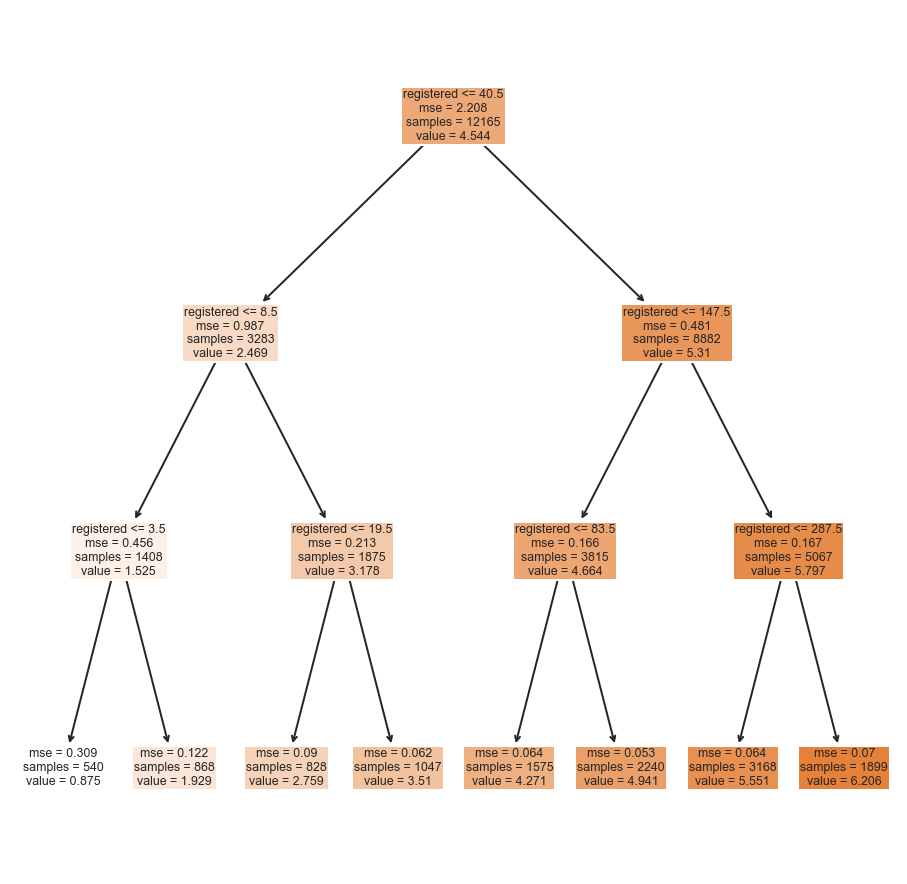

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 16)
clr = DTR.fit(X_train, y_train)
plot_tree(clr, filled=True,feature_names=X_train.columns,ax=ax)

plt.show()

# Conclusions/Inferences

We can see that the model that better predict the outcomes is the Random Forest with R^2 of 0.99 and Root Mean Square error(RMSE) of 0.015.

With OLS, we can see that the feature that most impact the outcome 'cnt' is atemp.

With Decision Tree we have 'registered' as the most decisive feature.